# **Extendamos el integrador de Euler a segundo Orden**

Dada una ecuación diferencial de la forma:

$$ y'(x) = f(x, y) $$

$$ y_{n+1} = y_{n} + h f(x,y) + \frac{h²}{2} \left( \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y} f \right) $$

In [11]:
def segundo_euler_orden1(ec_diff, ec_jac, p_ini, t_final, h=0.1):
    
    tiempo = arange(0, t_final + h, h)
    y = zeros(len(tiempo))
    y[0] = p_ini
    
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h * ec_diff(y[i], tiempo[i])
        y[i+1] += 0.5*(h**2)*ec_jac(y[i], tiempo[i])[0]
        y[i+1] += 0.5*(h**2)*ec_jac(y[i], tiempo[i])[1]*ec_diff(y[i], tiempo[i])
    
    return tiempo, y

In [4]:
from pylab import *
%matplotlib inline

/home/maunio/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
def primer_euler_orden1(ec_diff, p_ini, t_final, h=0.1):
    
    tiempo = arange(0, t_final + h, h)
    y = zeros(len(tiempo))
    y[0] = p_ini
    
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h * ec_diff(y[i], tiempo[i])
            
    return tiempo, y

In [7]:
def ec_diff_1(y, x):
    return x*sin(y)

def d_ec_diff_1(y, x):
    return sin(y), x*cos(y)

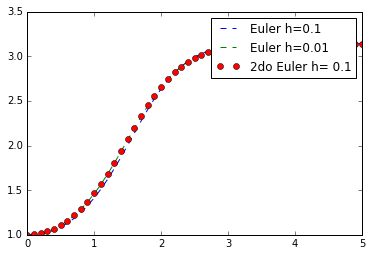

In [15]:
y_euler = primer_euler_orden1(ec_diff_1, 1, 5.0)
y_euler_01 = primer_euler_orden1(ec_diff_1, 1, 5.0, 0.01 )    
y_segundo_euler = segundo_euler_orden1(ec_diff_1, d_ec_diff_1, 1, 5.0)

plot(y_euler[0], y_euler[1], '--', label= "Euler h=0.1")
plot(y_euler_01[0], y_euler_01[1], '--', label= "Euler h=0.01")
plot(y_segundo_euler[0], y_segundo_euler[1], 'o', label= "2do Euler h= 0.1")
legend()
show()

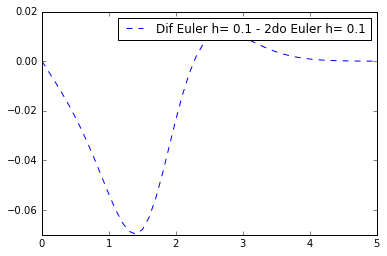

In [19]:
y_euler = primer_euler_orden1(ec_diff_1, 1, 5.0)
y_euler_01 = primer_euler_orden1(ec_diff_1, 1, 5.0, 0.01 )    
y_segundo_euler = segundo_euler_orden1(ec_diff_1, d_ec_diff_1, 1, 5.0)

y_bis = y_euler[1]-y_segundo_euler[1]

plot(y_euler[0], y_bis, '--', label= "Dif Euler h= 0.1 - 2do Euler h= 0.1")
legend()
show()